## Speech Recognition - Introduction


---

**Agenda**
1. Understand what is Speech Recognition
2. Well known industry use cases
3. Common tools / technologies for dealing with speech
4. Hands-on exercises

### 1. What is Speech Recognition?

Its a process of identifying spoken words and phrases and converting them into machine readable format.

Important factors to consider:
1. Transformation of audio (different audio file types)
2. Extraction is always raw and without any meaning
3. Extraction quality factors like `acoustic ambiguity` (sit upright OR seat a bright?)
4. Speaker identification (who's talking)
5. Language understanding (what's the meaning)
6. Meta features like timing, tone, quality etc. 

**A note about different audio file types**

| Filetype | Information |
| --- | --- |
| `mp3` | Most popular file type. Has a lossy compression format. Which means there are chances of data loss during compression. |
| `flec` | Less popular. Has a lossless compression and therefore guarantees data integrity during compression and resconstruction. |
| `wav` | Uncompressed audio data. Due to this the audio quality is the best. However the file size is large compared to other formats. Has built-in module in Python. |

**Audio Signal Parameters**
1. Number of channels
  - 1 channel a.k.a Mono
  - 2 channels a.k.a Stereo (Audio from 2 different directions)
2. Sample width (Number of Bytes for each sample)
3. Framerate / Sample Rate / Sample Frequency (Number of samples for each second)
  - Example - 44,100 Hz or 44.1 KHz. We get 44,100 sample values in each second
4. Number of frames
5. Values of frames (Data in binary format. Can be converted to integer)

### Speech recognition technologies

1. Acoustic Model
  - The acoustic model typically deals with the raw audio waveforms of human speech, predicting what phoneme each waveform corresponds to, typically at the character or subword level.

2. Language Model
  - The language model guides the acoustic model, discarding predictions which are improbable given the constraints of proper grammar and the topic of discussion.

### How it works

Sounds are stored as waves. We can use matplotlib to visualize it.

In [ ]:
# Install the speech recognition package
! pip install SpeechRecognition


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1


In [ ]:
# Import
import wave
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Open the file
wav_file = wave.open("/content/drive/MyDrive/sound.wav", "rb")

In [ ]:
# Print Channels
print(wav_file.getnchannels())


1


In [ ]:
# Print Sample Width
print(wav_file.getsampwidth())


2


In [ ]:
# Print Frame Rate
print(wav_file.getframerate())


8000


In [ ]:
# Print No.of Frames
print(wav_file.getnframes())


408226


In [ ]:
# Print all parameters
print(wav_file.getparams())


_wave_params(nchannels=1, sampwidth=2, framerate=8000, nframes=408226, comptype='NONE', compname='not compressed')


In [ ]:
# Visualize
sample_freq = wav_file.getframerate()
n_samples = wav_file.getnframes()
signal_wave = wav_file.readframes(-1)

In [ ]:
# Close the file
wav_file.close()


In [ ]:
# Length in seconds
audio_len = n_samples / sample_freq
print(audio_len)


51.02825


In [ ]:
# Get signal as array
signal_array = np.frombuffer(signal_wave, dtype=np.int16)


In [ ]:
signal_array

array([ -79, -104, -153, ..., -429, -379,  -60], dtype=int16)

In [ ]:
# signal_array.shape = -1, 2

In [ ]:
# c1 = signal_array.T[0]
# c2 = signal_array.T[1]

In [ ]:
# (c1[0] + c2[0])/2

-91.5

In [ ]:
np.linspace(0, 10, num=3)

array([ 0.,  5., 10.])

In [ ]:
times = np.linspace(0, audio_len, num=n_samples)

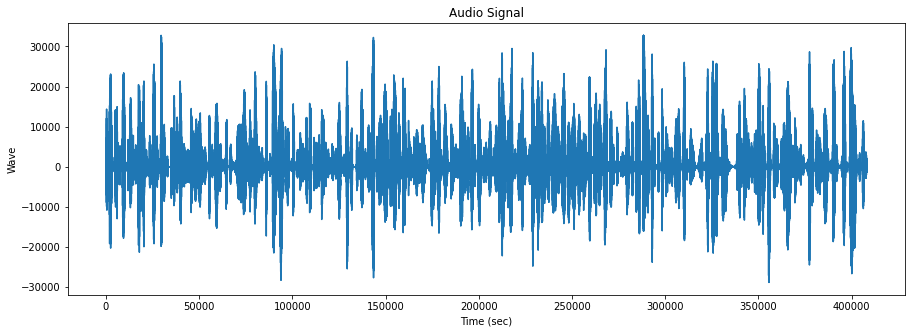

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot( signal_array)
# plt.plot( c2, color='red')
plt.title("Audio Signal")
plt.xlabel("Time (sec)")
plt.ylabel("Wave")
plt.show()


In [ ]:
#import library
import speech_recognition as sr
#Initiаlize  reсоgnizer  сlаss  (fоr  reсоgnizing  the  sрeeсh)
r = sr.Recognizer()
# Reading Audio file as source
#  listening  the  аudiо  file  аnd  stоre  in  аudiо_text  vаriаble
with sr.AudioFile('/content/drive/MyDrive/sound.wav') as source:
    audio_text = r.listen(source)
# recoginize_() method will throw a request error if the API is unreachable, hence using exception handling
    try:
        # using google speech recognition
        text = r.recognize_google(audio_text)
        print('Converting audio transcripts into text ...')
        print(text)
    except:
        print('Sorry.. run again...')

result2:
{   'alternative': [   {   'confidence': 0.97166753,
                           'transcript': 'but what if somebody decides to '
                                         'break it be careful that you keep '
                                         'adequate coverage but look for '
                                         "places to save money maybe it's "
                                         'taking longer to get things squared '
                                         'away then the bankers expected '
                                         "hiring the wife for one's company "
                                         'may win her tax aided retirement and '
                                         'come the Boost is helpful but '
                                         'inadequate new self deceiving Rags '
                                         'or horribly tossed on the two naked '
                                         'bones what a discussion Canyon Sue '
       

### Challenges identified
1. punctuations not identified
2. accuracy in conversion
3. couldnt identify all words
4. no idea about different speakers
5. every speaker has a different context
6. no idea about sentence context